In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras import datasets, layers, models

# Import Data

In [21]:
train = pd.read_csv('/Users/kachunsoh/ML/VS/computer_vision/Data/train.csv')#input your dataset pathway
test = pd.read_csv('/Users/kachunsoh/ML/VS/computer_vision/Data/test.csv')

In [22]:
trainlab=train['label']
train=train.drop(columns=['label'])

train=train.values.reshape(-1,28,28,1)
train=train/255
test=test.values.reshape(-1,28,28,1)
test=test/255
print(train.shape,test.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


# Visualize Image

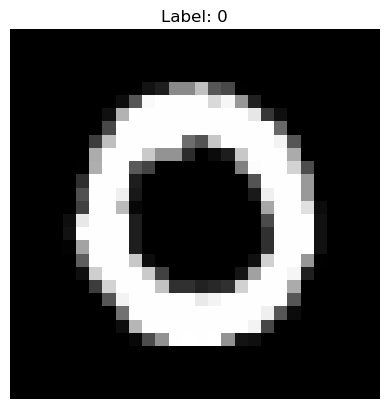

In [23]:
img = train[1]
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title('Label: {}'.format(trainlab[1]))
plt.show()


# CNN Model

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

# Compile the model and run

In [26]:
model.compile(optimizer = 'adam' , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [27]:
history = model.fit(train,trainlab,validation_split=.2,shuffle=True, epochs=20, 
                       batch_size=3264)

Epoch 1/20
11/11 [==============================] - 6s 486ms/step - loss: 2.0607 - accuracy: 0.4990 - val_loss: 1.3915 - val_accuracy: 0.7277
Epoch 2/20
11/11 [==============================] - 5s 485ms/step - loss: 0.8570 - accuracy: 0.7973 - val_loss: 0.4948 - val_accuracy: 0.8508
Epoch 3/20
11/11 [==============================] - 5s 476ms/step - loss: 0.4612 - accuracy: 0.8643 - val_loss: 0.3806 - val_accuracy: 0.8883
Epoch 4/20
11/11 [==============================] - 5s 493ms/step - loss: 0.3487 - accuracy: 0.8953 - val_loss: 0.2951 - val_accuracy: 0.9074
Epoch 5/20
11/11 [==============================] - 5s 490ms/step - loss: 0.2741 - accuracy: 0.9182 - val_loss: 0.2324 - val_accuracy: 0.9288
Epoch 6/20
11/11 [==============================] - 5s 457ms/step - loss: 0.2168 - accuracy: 0.9358 - val_loss: 0.1900 - val_accuracy: 0.9436
Epoch 7/20
11/11 [==============================] - 5s 465ms/step - loss: 0.1786 - accuracy: 0.9458 - val_loss: 0.1577 - val_accuracy: 0.9511
Epoch 

# Prediction

In [28]:
#make prediction
pred1=tf.argmax(model.predict(train),1)
pd.crosstab(trainlab, pred1, margins=True)

1313/1313 [==============================] - 5s 4ms/step


col_0,0,1,2,3,4,5,6,7,8,9,All
label,,,,,,,,,,,
0,4093,0,11,1,2,3,11,0,6,5,4132
1,0,4639,19,5,2,0,0,11,8,0,4684
2,5,5,4137,5,2,0,1,8,7,7,4177
3,4,0,26,4263,0,28,0,7,13,10,4351
4,4,7,9,0,3960,0,13,4,8,67,4072
5,3,1,3,13,4,3737,11,1,14,8,3795
6,14,2,2,0,4,13,4097,0,5,0,4137
7,3,9,48,7,2,2,0,4298,10,22,4401
8,6,10,14,8,0,10,6,1,3991,17,4063


# Confusion Matrix 

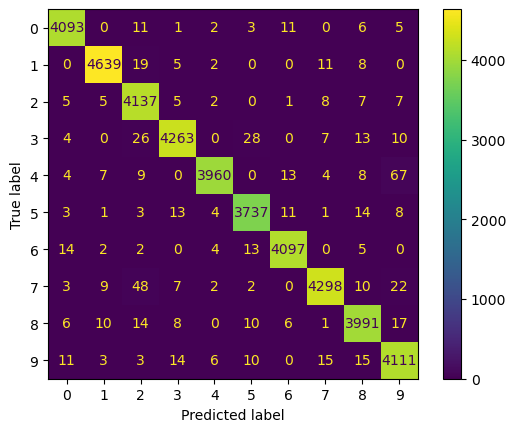

In [30]:
cm = confusion_matrix(trainlab, pred1)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

# Accuracy

In [29]:
sum(np.diagonal(pd.crosstab(trainlab,pred1)))/42000

0.9839523809523809